In [40]:
import os
import pandas as pd
import numpy as np
from yolov2 import Dataset, plot_true_tensor
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib qt5
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
rc('font', **font)

In [37]:
dataset = Dataset(
    'data/leaf_data_v2/train/',346,346,21,21,class_labels=['infected','not_infected']
    ,anchor_dims=[0.44752974, 0.51667883, 0.17638203, 0.16553482, 0.076274  ,
       0.10540195, 0.10295663, 0.23137522, 0.24225889, 0.3452266 ],img_extensions=['jpg','jpeg','JPG'],shuffle=True
)

C:\Users\siddh\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [38]:
X, y, mask = dataset[1]
plot_true_tensor(X,y,346,346,21,21,5,anchor_dim=[0.44752974, 0.51667883, 0.17638203, 0.16553482, 0.076274  ,
       0.10540195, 0.10295663, 0.23137522, 0.24225889, 0.3452266 ],en1=dataset.one_hot_encoder,en2=dataset.label_encoder,
                show_label=True,show_anchor=False,show_grid_cell_center=False)
len(dataset)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


389

In [31]:
X, y = dataset.get_sample(1)
y

,label,xmin,ymin,xmax,ymax,xc,yc,w,h,img_width,img_height
0,infected,0.250521,0.106481,0.604688,0.705556,0.427604,0.406019,0.354167,0.599074,1920,1080


In [150]:
(dataset.data_files['image'] == 'sample_b_55.jpg').argmax()

C:\Users\siddh\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


264

In [183]:
data_files = dataset.data_files.reset_index(drop=True)
path = 'data/leaf_data_v3/leaf_data_v3/'
prefix = 'sample_'
file_no = 1
data_files

,image,annotation
0,sample_merged_58.jpg,sample_merged_58.xml
1,sample_merged_144.jpg,sample_merged_144.xml
2,sample_merged_264.jpg,sample_merged_264.xml
3,sample_merged_49.jpg,sample_merged_49.xml
4,sample_merged_116.jpg,sample_merged_116.xml
5,sample_merged_66.jpg,sample_merged_66.xml
6,sample_merged_214.jpg,sample_merged_214.xml
7,sample_merged_140.jpg,sample_merged_140.xml
8,sample_merged_4.jpg,sample_merged_4.xml
9,sample_merged_286.jpg,sample_merged_286.xml


In [184]:
for i in range(data_files.shape[0]):
    src_file = os.path.join(path,data_files.iloc[i,0])
    dst_file = os.path.join(path,prefix+str(file_no)+'.jpg')
    os.rename(src_file,dst_file)
    src_file = os.path.join(path,data_files.iloc[i,1])
    dst_file = os.path.join(path,prefix+str(file_no)+'.xml')
    os.rename(src_file,dst_file)
    file_no+=1

In [80]:
base_dir = 'leaf_v2/'
file_names = os.listdir(base_dir)
len(file_names)
file_names

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'leaf_v2/'

In [73]:
#Get all image files that ends with .JPG and convert to .jpg
for i in file_names:
    if str.endswith(i,'.JPG'):
        os.rename(base_dir+i,base_dir+i[:-4]+'.jpg')

In [4]:
image_files = []
xml_files = []
for i in file_names:
    if str.endswith(i,'.jpg'):
        image_files.append(i)
    elif str.endswith(i,'.xml'):
        xml_files.append(i)

In [7]:
len(image_files)

431

In [8]:
len(xml_files)

431

In [84]:
label = 'not_infected_'
for i in range(len(image_files)):
    src_image = image_files[i]
    src_xml = src_image[:-4]+'.xml'
    
    dst_image = 'leaf_'+label+str(i)+'.jpg'
    dst_xml = 'leaf_'+label+str(i)+'.xml'
    
    os.rename(base_dir+src_image,base_dir+dst_image)
    os.rename(base_dir+src_xml,base_dir+dst_xml)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data/not_infected/leaf_not_infected_10.jpg' -> 'data/not_infected/leaf_not_infected_2.jpg'

In [85]:
image_files

['leaf_not_infected_0.jpg',
 'leaf_not_infected_1.jpg',
 'leaf_not_infected_10.jpg',
 'leaf_not_infected_11.jpg',
 'leaf_not_infected_12.jpg',
 'leaf_not_infected_13.jpg',
 'leaf_not_infected_14.jpg',
 'leaf_not_infected_15.jpg',
 'leaf_not_infected_16.jpg',
 'leaf_not_infected_17.jpg',
 'leaf_not_infected_18.jpg',
 'leaf_not_infected_19.jpg',
 'leaf_not_infected_2.jpg',
 'leaf_not_infected_20.jpg',
 'leaf_not_infected_21.jpg',
 'leaf_not_infected_22.jpg',
 'leaf_not_infected_23.jpg',
 'leaf_not_infected_24.jpg',
 'leaf_not_infected_25.jpg',
 'leaf_not_infected_26.jpg',
 'leaf_not_infected_27.jpg',
 'leaf_not_infected_28.jpg',
 'leaf_not_infected_29.jpg',
 'leaf_not_infected_3.jpg',
 'leaf_not_infected_30.jpg',
 'leaf_not_infected_31.jpg',
 'leaf_not_infected_32.jpg',
 'leaf_not_infected_33.jpg',
 'leaf_not_infected_34.jpg',
 'leaf_not_infected_4.jpg',
 'leaf_not_infected_5.jpg',
 'leaf_not_infected_6.jpg',
 'leaf_not_infected_7.jpg',
 'leaf_not_infected_8.jpg',
 'leaf_not_infected_9.j

In [86]:
xml_files

['leaf_not_infected_0.xml',
 'leaf_not_infected_1.xml',
 'leaf_not_infected_10.xml',
 'leaf_not_infected_11.xml',
 'leaf_not_infected_12.xml',
 'leaf_not_infected_13.xml',
 'leaf_not_infected_14.xml',
 'leaf_not_infected_15.xml',
 'leaf_not_infected_16.xml',
 'leaf_not_infected_17.xml',
 'leaf_not_infected_18.xml',
 'leaf_not_infected_19.xml',
 'leaf_not_infected_2.xml',
 'leaf_not_infected_20.xml',
 'leaf_not_infected_21.xml',
 'leaf_not_infected_22.xml',
 'leaf_not_infected_23.xml',
 'leaf_not_infected_24.xml',
 'leaf_not_infected_25.xml',
 'leaf_not_infected_26.xml',
 'leaf_not_infected_27.xml',
 'leaf_not_infected_28.xml',
 'leaf_not_infected_29.xml',
 'leaf_not_infected_3.xml',
 'leaf_not_infected_30.xml',
 'leaf_not_infected_31.xml',
 'leaf_not_infected_32.xml',
 'leaf_not_infected_33.xml',
 'leaf_not_infected_34.xml',
 'leaf_not_infected_4.xml',
 'leaf_not_infected_5.xml',
 'leaf_not_infected_6.xml',
 'leaf_not_infected_7.xml',
 'leaf_not_infected_8.xml',
 'leaf_not_infected_9.x

In [12]:
df = pd.DataFrame({'image_file':image_files,'annotation_file':xml_files})

In [14]:
df = df.sample(frac=1).reset_index(drop=True)
df

,image_file,annotation_file
0,leaf_infected_328.jpg,leaf_infected_328.xml
1,leaf_infected_2.jpg,leaf_infected_2.xml
2,leaf_infected_216.jpg,leaf_infected_216.xml
3,leaf_infected_177.jpg,leaf_infected_177.xml
4,leaf_infected_320.jpg,leaf_infected_320.xml
5,leaf_infected_27.jpg,leaf_infected_27.xml
6,leaf_infected_210.jpg,leaf_infected_210.xml
7,leaf_infected_302.jpg,leaf_infected_302.xml
8,leaf_infected_204.jpg,leaf_infected_204.xml
9,leaf_not_infected_15.jpg,leaf_not_infected_15.xml


In [89]:
df.iloc[0,1]

'leaf_not_infected_24.xml'

In [82]:
for i in range(df.shape[0]):
    if i < 32:
        os.rename('leaf/'+df.iloc[i,0],'leaf/test/'+df.iloc[i,0])
        os.rename('leaf/'+df.iloc[i,1],'leaf/test/'+df.iloc[i,1])
    else:
        os.rename('leaf/'+df.iloc[i,0],'leaf/train/'+df.iloc[i,0])
        os.rename('leaf/'+df.iloc[i,1],'leaf/train/'+df.iloc[i,1])

In [55]:
#Split Dataset
#Split ratio in percentage
split_ratio = 10 
folder_train = 'train/'
folder_test = 'test/'
base_dir = 'leaf_data_v2/infected/'

file_names = os.listdir(base_dir)
image_files = []
xml_files = []
for i in file_names:
    if str.endswith(i,'.jpg'):
        image_files.append(i)
    elif str.endswith(i,'.xml'):
        xml_files.append(i)
df = pd.DataFrame({'image_file':image_files,'annotation_file':xml_files})
df = df.sample(frac=1).reset_index(drop=True)

df.head()
n_train_samples = int(np.ceil((100 - split_ratio) / 100.0 * df.shape[0]))
n_test_samples = int(df.shape[0] - n_train_samples)

os.mkdir(base_dir+folder_test)
os.mkdir(base_dir+folder_train)

folder = folder_train
for i in range(n_train_samples):
    os.rename(base_dir+df.iloc[i,0],base_dir+folder+df.iloc[i,0])
    os.rename(base_dir+df.iloc[i,1],base_dir+folder+df.iloc[i,1])

    
file_names = os.listdir(base_dir)
image_files = []
xml_files = []
for i in file_names:
    if str.endswith(i,'.jpg'):
        image_files.append(i)
    elif str.endswith(i,'.xml'):
        xml_files.append(i)
df = pd.DataFrame({'image_file':image_files,'annotation_file':xml_files})
df = df.sample(frac=1).reset_index(drop=True)
folder = folder_test

for i in range(n_test_samples):
    os.rename(base_dir+df.iloc[i,0],base_dir+folder+df.iloc[i,0])
    os.rename(base_dir+df.iloc[i,1],base_dir+folder+df.iloc[i,1])

In [1]:
#########################################
#Data Augmentation with fliping horizontally and vertically 
#########################################

In [7]:
import os
import pandas as pd
import numpy as np
from dataset import Dataset
import matplotlib.pyplot as plt

In [4]:
dataset = Dataset('data/leaf_data_v2/train/','data/leaf_data_v2/test/',shuffle=False)

In [5]:
img, ann = dataset.next_train_sample()

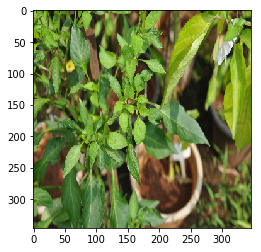

In [8]:
plt.imshow(img)